In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [122]:
df=pd.read_csv('housing data.csv',engine='python', encoding='latin1', header=None)

nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                    'LSTAT' ,'MEDV']
df.columns = nombres_columnas

A la hora de cargar el dataframe no aparecen los nombres de las columnas por lo que se rescatan de la información y se añaden para que sea más claro.

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Información de cada variable:**

* CRIM: Tasa de criminalidad per cápita por territorio
* ZN: Proporción de terreno residencial zonificado para lotes de más de 25,000 (ft)
* INDUS: Proporción de acres de negocios no minoristas por pueblo
* CHAS: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)
* NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
* RM: Número promedio de habitaciones por vivienda
* AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940
* DIS: Distancias ponderadas a cinco centros de ayuda al empleo en Boston
* RAD: Índice de accesibilidad a carreteras radiales
* TAX: Tasa de impuestos a la propiedad de valor total por 10,000 dólares.
* PTRATIO: Ratio de alumno-maestro por territorio
* B: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas negra por pueblo
* LSTAT: % de estatus más bajo de la población
* MEDV: Valor mediano de viviendas ocupadas por el propietario en miles de dólares 1000 dólares.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Ninguna de las variables tiene valores nulos, todas las variables son de tipo numérico. Todas menos CHAS y RAD comprenden números decimales. El atributo 'CHAS', aunque sea también de tipo numérico, describe dos valores por lo que se trata de una variable binaria tratándose de una variable categórica. 'RAD' se trata de un indice, describe 9 valores possibles, por es una variable integer.

In [61]:
df['CHAS'].unique()

array([0, 1])

La variable 'CHAS' es una variable categórica binaria
 - 1 = si el área limita con el río
 - 0 = en caso contrario

In [60]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [5]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Se realiza una descripción estadística de los distintos atributos del dataframe. Estos datos estadísticos proporcionan una visión general de la distribución y variabilidad de los datos en cada variable.

In [31]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

El dataframe no tiene valores nulos

In [7]:
df.duplicated().sum()

0

El dataframe no tiene valores duplicados.

<AxesSubplot:>

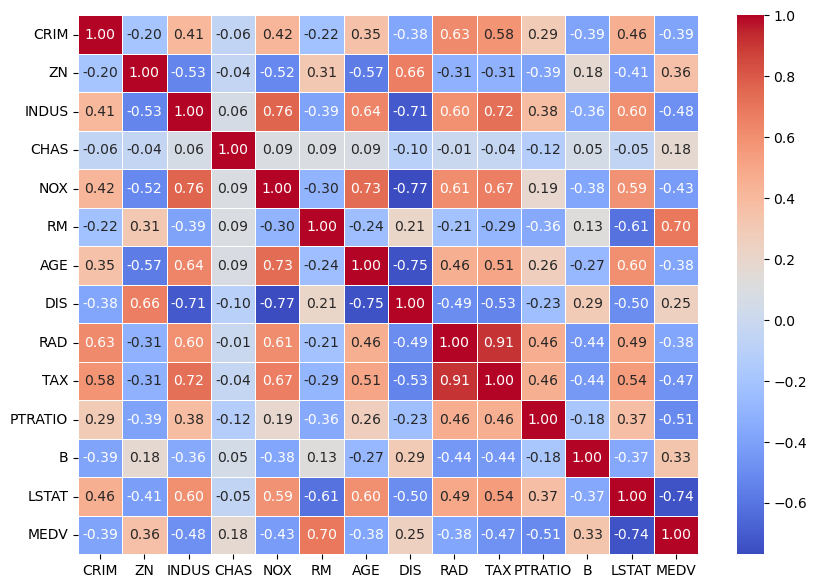

In [56]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, cmap='coolwarm')

El heatmap nos aporta una matriz de correlación con el número de coeficiente de correlación. -1 seria una correlación negativa perfecta, 1 correlación positiva y 0 no correlación. Rojo intenso o azul intenso indica fuerte correlación, mientras que blanco no correlación. Se destaca:

    * la variable 'RAD' tiene una fuerte correlación positiva con 'TAX' (0.91)
    * la variable 'NOX' tiene correlación negativa con 'DIS' (0.77)
    * la variable 'LSTAT' tiene correlación negativa con 'MEDV' (0.74)
    * la variable 'AGE' tiene correlación negativa con 'DIS' (0.75)
    * la variable 'INDUS' tiene correlación negativa con 'DIS' (0.71)
    * la variable 'RM' tiene correlación negativa con 'MEDV' (0.70)


 # Exercici 1
- Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [123]:
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                    'B','LSTAT']]
y=df['MEDV']

En el conjunto de datos, la variable dependiente es MEDV (y), que representa la mediana del valor de las viviendas ocupadas por sus propietarios en miles de dólares. Esto significa que el target es predecir la variabilidad de la mediana del valor de las viviendas en función de otras variables.

Entonces, las variables independientes (X) serían todas las demás columnas en el conjunto de datos, ya que estas se utilizarán para predecir la variable MEDV.

In [124]:
#Se dividen los datos en conjuntos de entrenamiento y prueba
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

La división en conjuntos de entrenamiento y prueba (train-test split) se utiliza para evaluar el rendimiento de un modelo. Se divide el conjunto de datos en dos partes: un conjunto de entrenamiento (train 80%) y un conjunto de prueba  (test 20%).

Este test permite evaluar el rendimiento del modelo en datos no vistos. Esto es crucial para estimar cómo se comportará el modelo en situaciones del mundo real. Además previene el overfitting, es decir si el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. Al tener un conjunto de prueba separado, se puede evaluar si el modelo tiene overfitting.


In [8]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Training test shape:", X_test.shape, y_test.shape)

Training set shape: (404, 13) (404,)
Training test shape: (102, 13) (102,)


Se comprueba que se ha realizado correctamentela división de los datos obteniendo el número de datos que hay en el train como en el test. La división es correcta.

In [12]:
y_train.describe().round(2)

count    404.00
mean      22.80
std        9.33
min        5.00
25%       16.95
50%       21.60
75%       26.40
max       50.00
Name: MEDV, dtype: float64

In [13]:
y_test.describe().round(2)

count    102.00
mean      21.49
std        8.61
min        5.00
25%       17.12
50%       20.15
75%       24.08
max       50.00
Name: MEDV, dtype: float64

Se observa en el resumen estadístico de train y test que incluye el recuento total de muestras, la media, la desviación estándar, cuartiles, el dato mínimo y el máximo. Se intuye una similitud en los datos tanto del train como del test. Se puede comprender en profundidad con un resumen de cada una de las variables. 


In [10]:
X_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.61,11.57,10.99,0.07,0.56,6.32,68.56,3.81,9.36,404.03,18.32,356.28,12.46
std,8.88,23.15,6.89,0.26,0.12,0.71,27.99,2.13,8.59,166.17,2.23,91.57,7.11
min,0.01,0.00,0.74,0.00,0.38,3.86,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.13,0.00,0.45,5.89,45.55,2.09,4.00,279.00,16.80,375.47,6.77
50%,0.26,0.00,8.56,0.00,0.54,6.21,77.70,3.18,5.00,330.00,18.70,391.30,10.92
75%,3.20,20.00,18.10,0.00,0.63,6.64,93.65,5.40,12.00,666.00,20.20,395.76,16.37
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


Se realiza una descripción estadística de los distintos atributos del conjunto train.

In [11]:
X_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.0,102.00,102.00
mean,3.63,10.55,11.74,0.06,0.55,6.16,68.65,3.74,10.31,424.89,19.0,358.24,13.43
std,7.46,24.08,6.72,0.24,0.11,0.66,28.89,2.01,9.16,177.46,1.8,90.64,7.24
min,0.01,0.00,0.46,0.00,0.39,3.56,6.20,1.17,1.00,188.00,13.0,6.68,2.88
25%,0.09,0.00,6.10,0.00,0.45,5.87,43.80,2.26,4.00,281.75,18.4,375.02,7.69
50%,0.21,0.00,10.59,0.00,0.53,6.17,74.70,3.35,5.00,345.00,19.2,392.21,12.34
75%,4.52,0.00,18.10,0.00,0.62,6.48,95.22,4.76,24.00,666.00,20.2,396.90,18.02
max,45.75,95.00,27.74,1.00,0.87,8.03,100.00,10.71,24.00,711.00,22.0,396.90,36.98


Se realiza una descripción estadística de los distintos atributos del conjunto test.

In [69]:
#Test Shapiro-Wilk
from scipy.stats import shapiro
for variable in X_train:
    stat, p = shapiro(X_train[variable])
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05: 
        print('No hay evidencia para rechazar la hipótesis nula, la distribución problablemente es Gaussiana\n')
        
    else:
        print('Se rechaza la hipótesis nula, la distribución NO es gaussiana\n')
        

stat=0.431, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.569, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.892, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.281, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.934, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.959, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.894, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.901, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.680, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.818, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.910, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.479, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat

Aquí se desvela que ninguna de las variables del train sigue una distribución gaussiana por lo que se rechaza la hipótesis nula. Ahora se realizará el mismo test con las variables del test,y se debería obtener el mismo resultado.

In [77]:
#Test Shapiro-Wilk
from scipy.stats import shapiro
for variable in X_test:
    stat, p = shapiro(X_test[variable])
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05: 
        print('No hay evidencia para rechazar la hipótesis nula, la distribución problablemente es Gaussiana\n')
        
    else:
        print('Se rechaza la hipótesis nula, la distribución NO es gaussiana\n')

stat=0.547, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.578, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.899, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.297, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.937, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.955, p=0.002
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.870, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.892, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.670, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.825, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.920, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat=0.500, p=0.000
Se rechaza la hipótesis nula, la distribución NO es gaussiana

stat

También se rechaza la hipótesis nula, tratándose de una distribución no gaussiana de las variables test.

In [76]:
from scipy.stats import mannwhitneyu

for variable in X_train:
    statistic, p_value = mannwhitneyu(X_train[variable], X_test[variable])

# Imprimir el resultado
    print(f"Variable: {variable}")
    print(f"Estadístico U: {statistic}")
    print(f"Valor p: {p_value}")

# Tomar una decisión basada en el valor p
    if p_value < 0.05:
        print("Se rechaza la hipótesis nula. Hay evidencia de diferencia significativa.\n")
    else:
        print("No hay suficiente evidencia para rechazar la hipótesis nula.\n")


Variable: CRIM
Estadístico U: 21090.0
Valor p: 0.7129128404285563
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: ZN
Estadístico U: 20080.5
Valor p: 0.6096048692789081
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: INDUS
Estadístico U: 19864.5
Valor p: 0.5719097053113792
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: CHAS
Estadístico U: 20365.0
Valor p: 0.6808733201341369
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: NOX
Estadístico U: 20461.0
Valor p: 0.9139785681672831
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: RM
Estadístico U: 19670.5
Valor p: 0.47950696090438694
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: AGE
Estadístico U: 20660.5
Valor p: 0.9661367588016637
No hay suficiente evidencia para rechazar la hipótesis nula.

Variable: DIS
Estadístico U: 20642.5
Valor p: 0.9770247009980821
No hay suficiente evidencia para rechazar l

El test de U de Mann-Whitney evalúa la hipótesis nula de que no hay diferencia entre las distribuciones de las dos muestras (train y test). De esta forma se evalua si las variables en ambos conjuntos provienen de datos con distribuciones estadísticamente similares. Es común aplicarlo en la comparación de las distribuciones del train y el test para evaluar la generalización del modelo en nuevos datos.

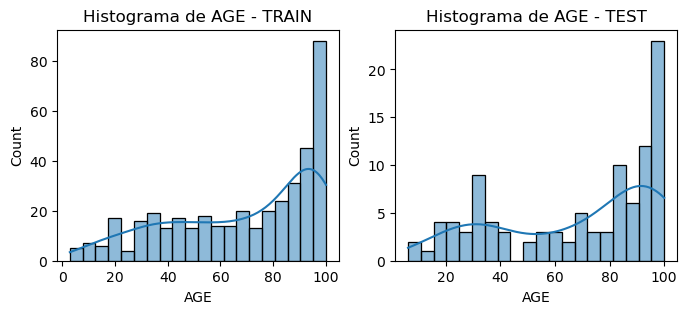

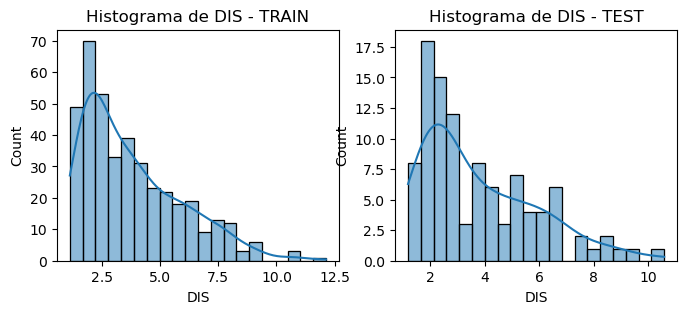

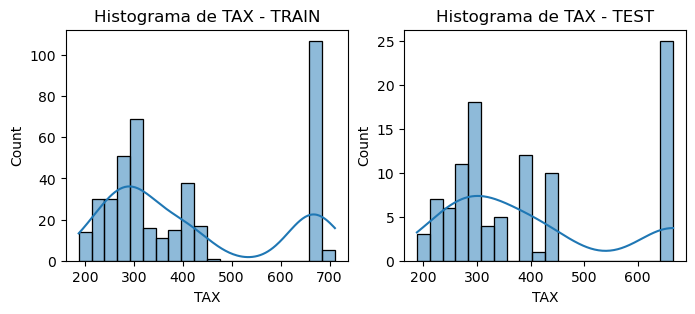

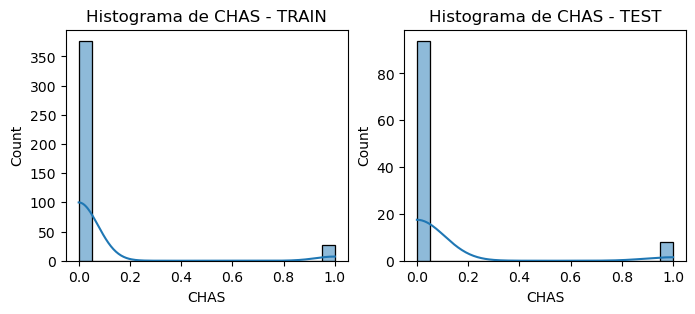

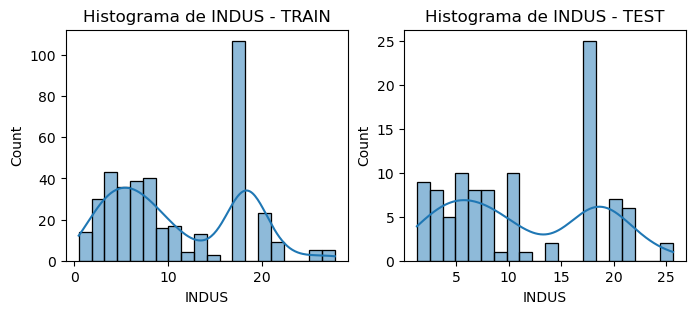

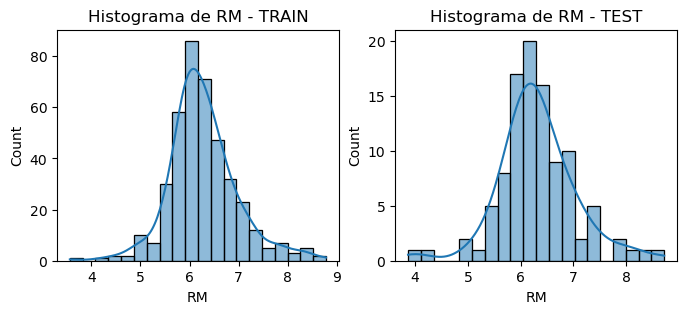

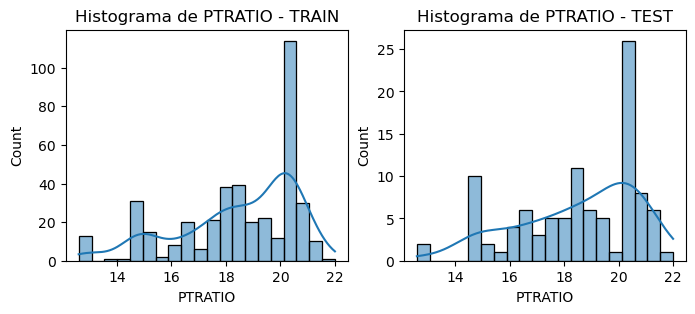

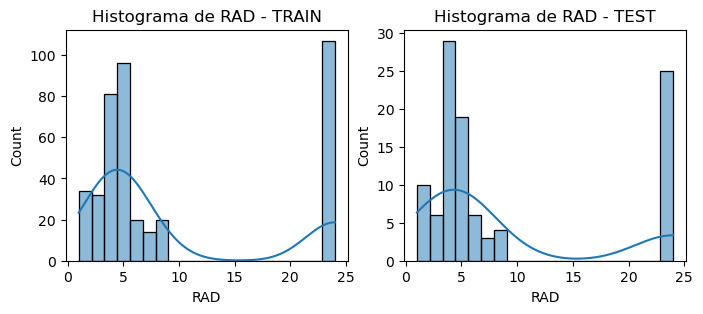

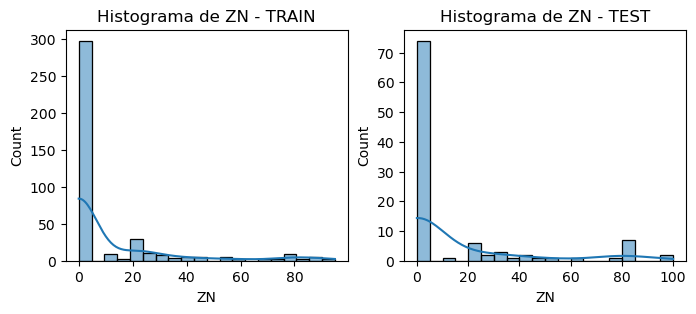

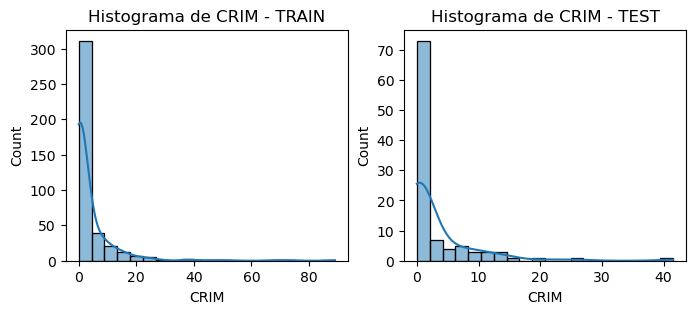

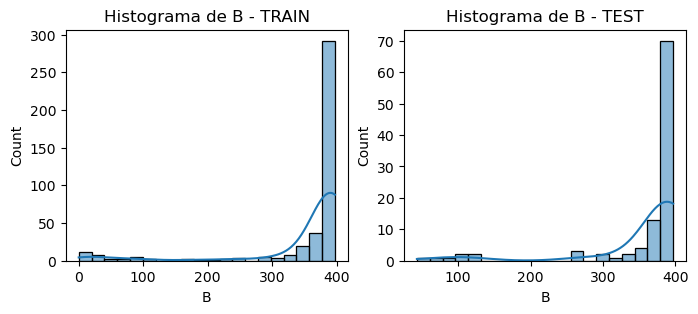

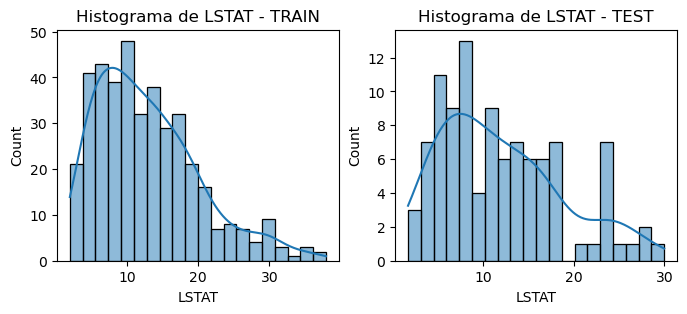

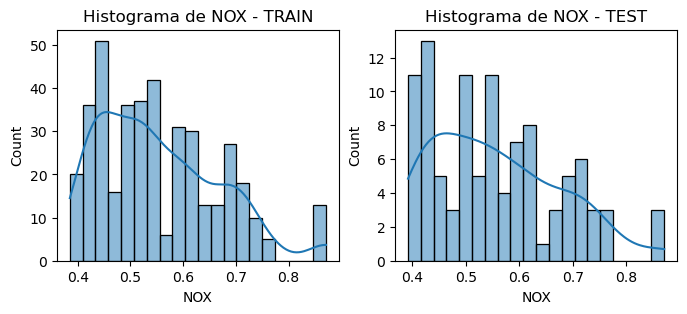

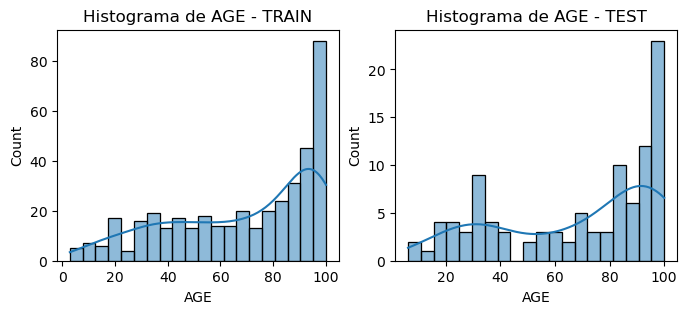

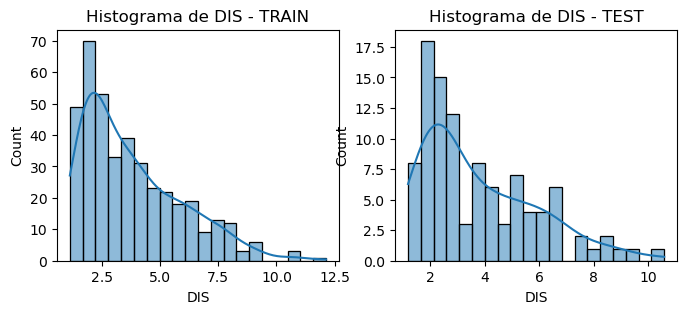

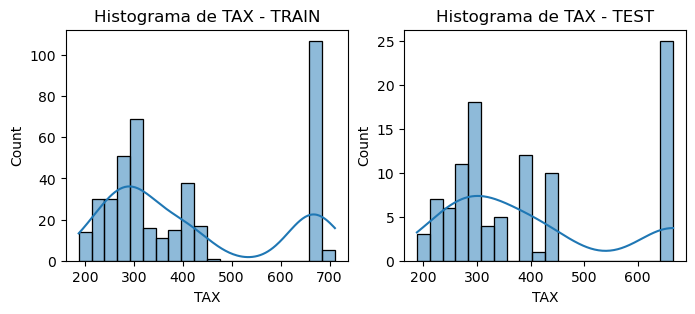

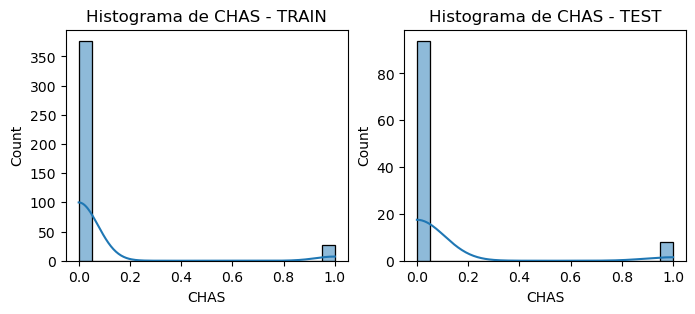

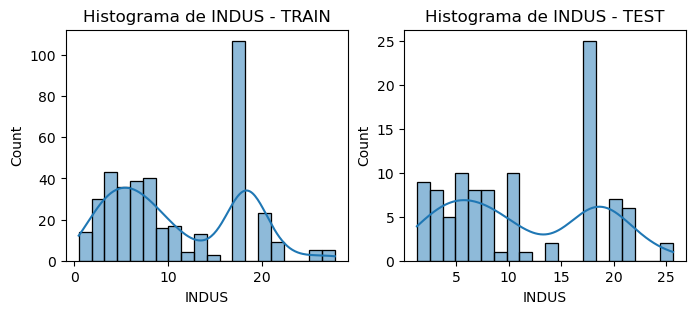

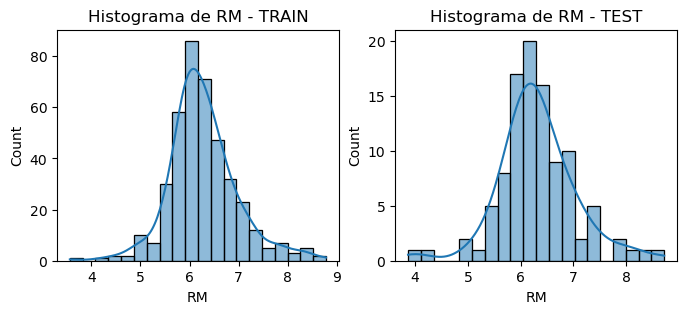

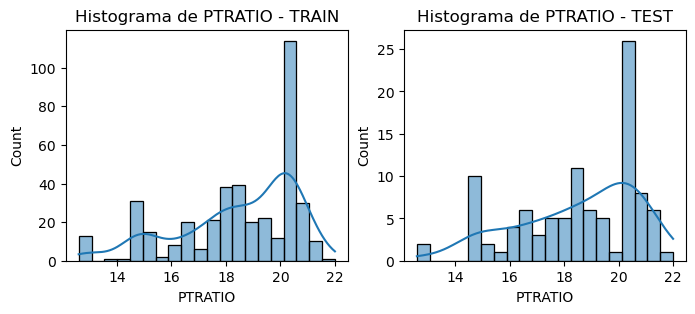

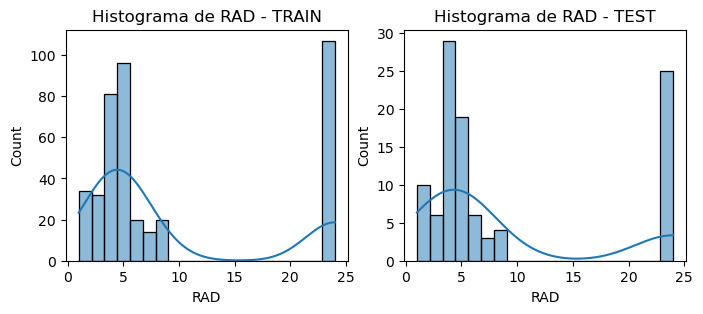

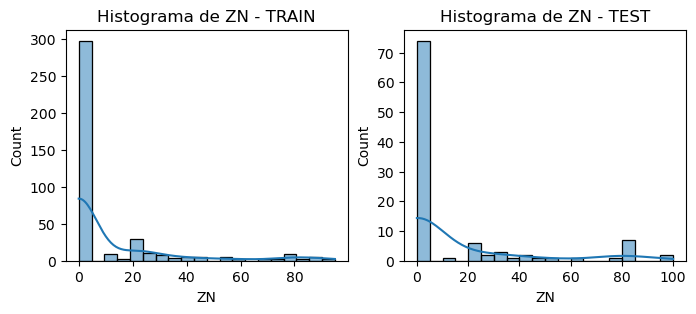

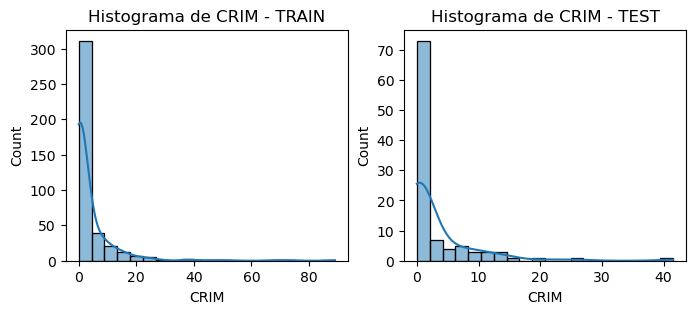

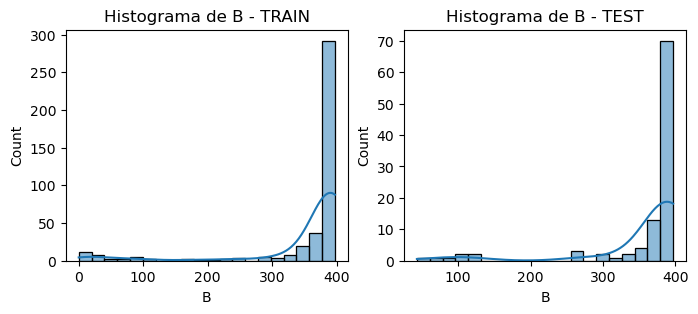

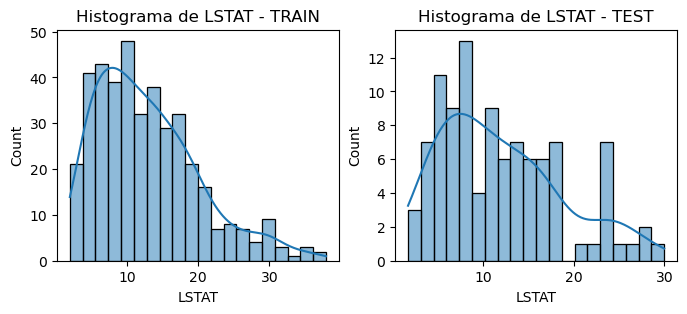

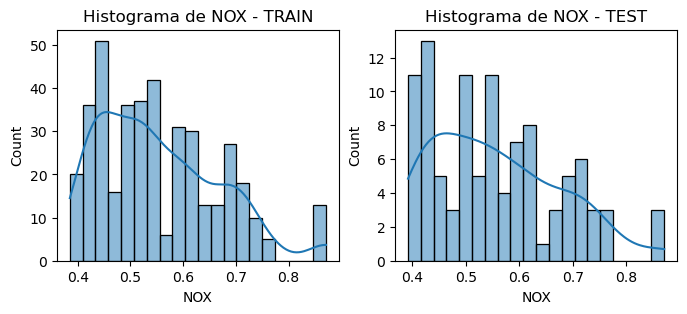

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


# lista de variables en común entre TRAIN y TEST
common_variables = set(X_train.columns).intersection(X_test.columns)

# Iterar sobre las variables y generar histplots para TRAIN y TEST
for variable in common_variables:
    plt.figure(figsize=(8, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], kde=True, bins=20)
    plt.title(f'Histograma de {variable} - TRAIN')
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.histplot(X_test[variable], kde=True, bins=20)
    plt.title(f'Histograma de {variable} - TEST')
    plt.xlabel(variable)



Se visualizan las distribuciones de las variables tanto de train como de test. Se puede afirmar que los datos del train y los datos del test siguen distribuciones similares. Como ya habíamos confirmado a través del test de U de Mann-Whitney.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

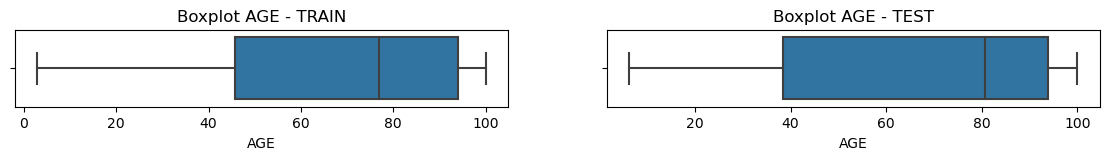

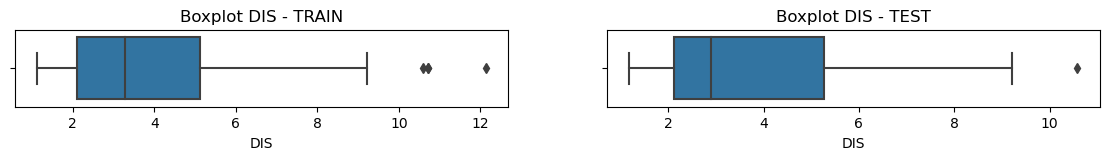

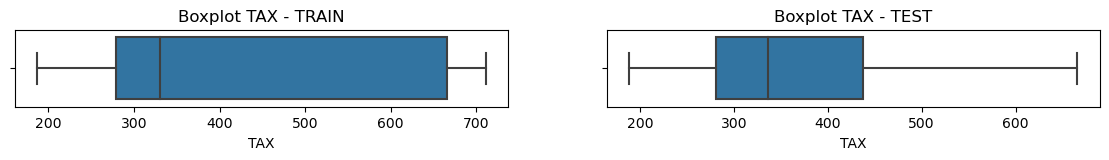

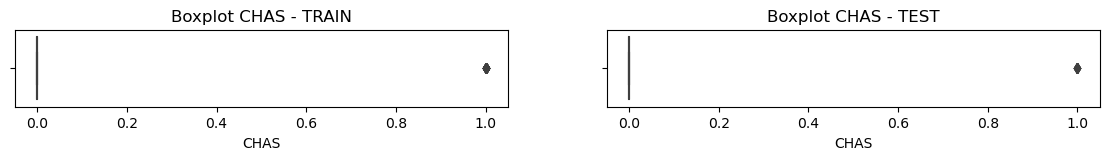

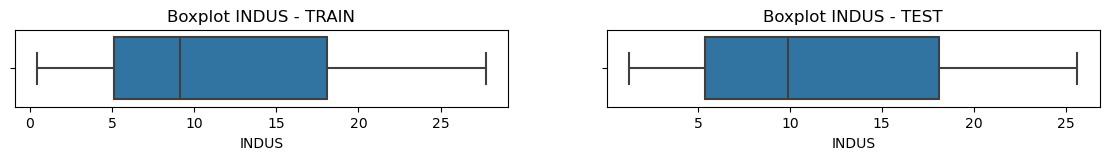

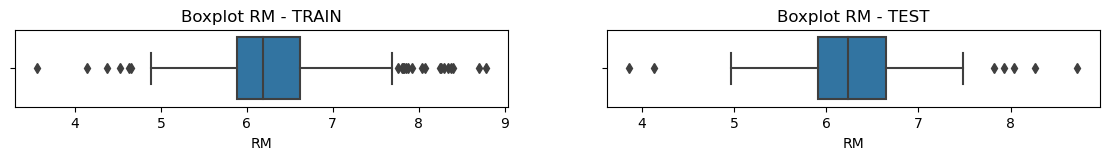

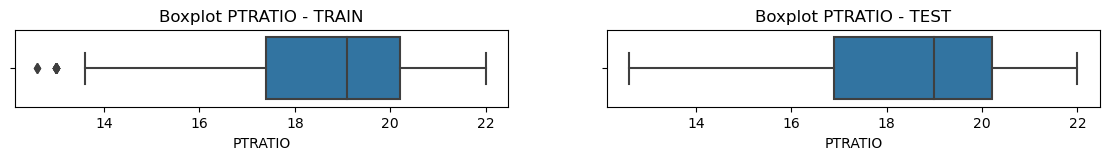

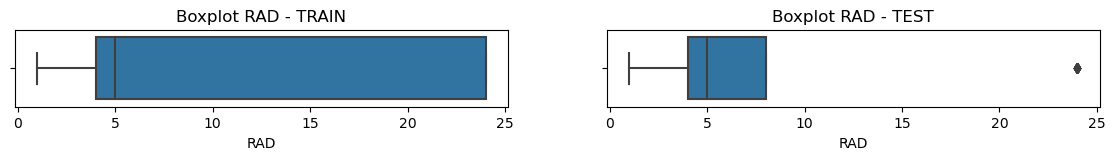

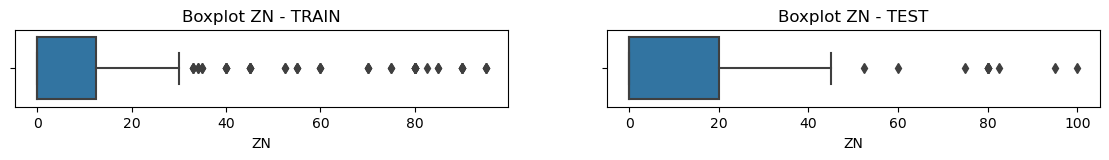

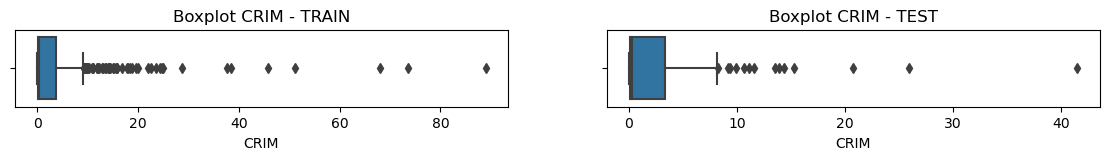

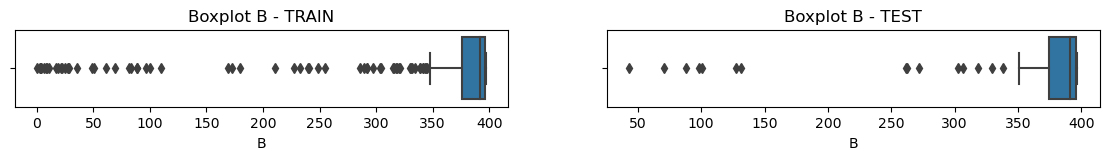

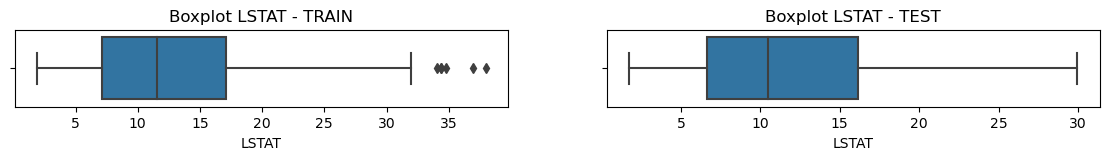

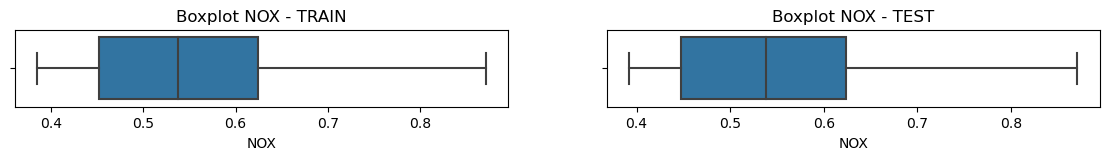

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns


# lista de variables en común entre TRAIN y TEST
common_variables = set(X_train.columns).intersection(X_test.columns)

# Iterar sobre las variables y generar histplots para TRAIN y TEST
for variable in common_variables:
    plt.figure(figsize=(14, 1))

    plt.subplot(1, 2, 1)
    sns.boxplot(X_train[variable]);
    plt.title(f'Boxplot {variable} - TRAIN')
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(X_test[variable]);
    plt.title(f'Boxplot {variable} - TEST')
    plt.xlabel(variable)


Se ha realizado un boxplot por cada variable para visualizar la distribución de los datos tanto del train como del test. Visualizando de manera detallada se detectan coincidencias en el rango intercuartil, la mediana y los bigotes. Se puede concluir que existe una simetría entre cada una de las variables de train y de test.


La variable **RAD** que presenta una distribución aparentemente anómala, pero tomando en consideración que se trata de una variable categórica que muestra un índice, y dicho índice salta del 7 al 24 (tal y como se mostro anteriormente con unique()), es lógico que en el test donde aparecen menos datos, pueda existir un número reducido de muestra que llegue hasta el 25 por lo tanto lo considere outlier, mientras que en el train, hay un mayor número de datos, y si que los incluye en la caja.

También se observa como la variable **CHAS** es binominal por lo que solo admite dos posibilidades. Por ello no se visualiza ninguna caja ni bigotes, típicos de boxplot.


# Exercici 2
- Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Para estandarizar los datos, se debe conocer qué tipo de datos tenemos en el dataframe y así poder escoger un correcto modo de estandarizar dichos datos. 
Teniendo en cuenta que el test de Shapiro-Wilk determinó que la distribución de las variables no es gaussiana. No sería óptimo utilizar el StandardScaler.
Teniendo en cuenta si hay outliers o no en la muesta de train, se utilizaran dos procesos, en el caso de tener outliers se realiza una estandarización robustscaler. En caso contrario un min-max  scaler. 

Estandarización datos:
* StandardScaler() - desviación normal
* MinMaxScaler() - sin outliers
* RobustScaler() - con outliers

Teniendo en cuenta el boxplot realizado en el ejercicio anterior, se determina que:
- Presencia de outliers: DIS, RM,  PTRATIO, ZN, CRIM, B, LSTAT.
- Ausencia de outliers: AGE, TAX, INDUS, NOX, RAD.

La variable CHAS es categorica.

La variable RAD también categórica, se realizará una columna dummies. Ya que son comunmente utilizadas para representar información categórica en modelos de regresión y otras técnicas de aprendizaje automático. De este modo  se puede convertir la variable categórica en un formato que puede ser utilizado por algoritmos de machine learning que requiere entradas numéricas.

In [170]:
X_train1=X_train.copy()
X_train1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432.0,17.8,394.95,16.21
218,0.11069,0.0,13.89,1,0.550,5.951,93.8,2.8893,5,276.0,16.4,396.90,17.92
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666.0,20.2,96.73,21.52
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403.0,14.7,391.71,29.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
473,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,24,666.0,20.2,374.68,11.66
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,20.2,7.68,24.39


Se crea una copia del dataframe X_train para luego poder comparar el original con el transformado.

In [156]:
# Crear columna dummy de columna 'RAD'
column_dummies = pd.get_dummies(X_train1['RAD'], prefix='RAD')

# Concatenar las columnas dummy al DataFrame original
X_train_scaled1 = pd.concat([X_train1, column_dummies], axis=1)

#Se elimina la columna original y una dummie
X_train_scaled1.drop(['RAD','RAD_1'], axis=1, inplace=True)

print(column_dummies)

     RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24
266      0      0      0      0      1      0      0      0       0
112      0      0      0      0      0      1      0      0       0
218      0      0      0      0      1      0      0      0       0
428      0      0      0      0      0      0      0      0       1
147      0      0      0      0      1      0      0      0       0
..     ...    ...    ...    ...    ...    ...    ...    ...     ...
324      0      0      0      0      1      0      0      0       0
473      0      0      0      0      0      0      0      0       1
106      0      0      0      0      1      0      0      0       0
425      0      0      0      0      0      0      0      0       1
8        0      0      0      0      1      0      0      0       0

[404 rows x 9 columns]


En este caso se han creado 9 columnas dummies con el nombre de la variable RAD y su índice. Se ha eliminado la columna original RAD. Para la creación de un modelo, se elimina una de las columnas generadas a partir de la variable categórica original cuando se crea un conjunto de columnas dummy. 

Para evitar la trampa de la multicolinealidad, que ocurre cuando dos o más variables predictoras en un modelo están altamente correlacionadas. Comunmente se elimina una. Al incluir todas las columnas dummy en un modelo de regresión, se introduce multicolinealidad perfecta, ya que la información sobre una categoría se puede deducir completamente de las otras categorías, para evitar eso se elimina una.

In [157]:
X_train_scaled1.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
RAD_2        uint8
RAD_3        uint8
RAD_4        uint8
RAD_5        uint8
RAD_6        uint8
RAD_7        uint8
RAD_8        uint8
RAD_24       uint8
dtype: object

Aquí ya no aparece la columna RAD original ni la dummie que hemos eliminado, solo las dummies creadas. 

In [172]:
from sklearn.preprocessing import MinMaxScaler

columnas = ['AGE', 'TAX', 'INDUS', 'NOX']

X_train_scaled1[columnas] = scaler.fit_transform(X_train1[columnas])

X_train_scaled1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
266,0.78570,20.0,-0.441018,0,0.612360,7.014,0.146543,2.1329,-0.172775,13.0,384.07,14.79,0,0,0,1,0,0,0,0
112,0.12329,0.0,0.024672,0,0.050562,5.913,0.317853,2.3534,0.267016,17.8,394.95,16.21,0,0,0,0,1,0,0,0
218,0.11069,0.0,0.323824,1,0.067416,5.951,0.336429,2.8893,-0.141361,16.4,396.90,17.92,0,0,0,1,0,0,0,0
428,7.36711,0.0,0.648419,0,0.792135,6.193,0.012384,1.9356,0.879581,20.2,96.73,21.52,0,0,0,0,0,0,0,1
147,2.36862,0.0,0.762529,0,1.870787,4.926,0.375645,1.4608,0.191099,14.7,391.71,29.53,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.34109,0.0,-0.178103,0,-0.252809,6.415,-0.771930,4.7211,-0.112565,19.6,396.90,6.12,0,0,0,1,0,0,0,0
473,4.64689,0.0,0.648419,0,0.426966,6.980,-0.204334,2.5329,0.879581,20.2,374.68,11.66,0,0,0,0,0,0,0,1
106,0.17120,0.0,-0.087124,0,-0.101124,5.836,0.297214,2.2110,0.141361,20.9,395.67,18.66,0,0,0,1,0,0,0,0
425,15.86030,0.0,0.648419,0,0.792135,5.896,0.369453,1.9096,0.879581,20.2,7.68,24.39,0,0,0,0,0,0,0,1


Se transforman las columnas 'AGE', 'TAX', 'INDUS', 'NOX' que no tenian outliers con Min-Max en el rango de -1 al 1. En estas columnas no encontraremos datos fuera de estos dos valores, que serán el min y el max.

In [173]:
from sklearn.preprocessing import RobustScaler

columnas_out = ['DIS', 'RM', 'PTRATIO', 'ZN', 'CRIM', 'B', 'LSTAT']
scaler = RobustScaler()
X_train_scaled1[columnas_out] = scaler.fit_transform(X_train_scaled1[columnas_out])

X_train_scaled1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
266,0.137860,1.6,-0.441018,0,0.612360,1.187154,0.146543,-0.351868,-0.172775,-2.103448,-0.364918,0.380236,0,0,0,1,0,0,0,0
112,-0.040769,0.0,0.024672,0,0.050562,-0.438538,0.317853,-0.278538,0.267016,-0.448276,0.155096,0.532760,0,0,0,0,1,0,0,0
218,-0.044167,0.0,0.323824,1,0.067416,-0.382429,0.336429,-0.100318,-0.141361,-0.931034,0.248297,0.716434,0,0,0,1,0,0,0,0
428,1.912643,0.0,0.648419,0,0.792135,-0.025102,0.012384,-0.417483,0.879581,0.379310,-14.098459,1.103115,0,0,0,0,0,0,0,1
147,0.564720,0.0,0.762529,0,1.870787,-1.895903,0.375645,-0.575384,0.191099,-1.517241,0.000239,1.963480,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.017964,0.0,-0.178103,0,-0.252809,0.302695,-0.771930,0.508871,-0.112565,0.172414,0.248297,-0.551020,0,0,0,1,0,0,0,0
473,1.179092,0.0,0.648419,0,0.426966,1.136951,-0.204334,-0.218843,0.879581,0.379310,-0.813717,0.044039,0,0,0,0,0,0,0,1
106,-0.027850,0.0,-0.087124,0,-0.101124,-0.552233,0.297214,-0.325895,0.141361,0.620690,0.189509,0.795918,0,0,0,1,0,0,0,0
425,4.202968,0.0,0.648419,0,0.792135,-0.463640,0.369453,-0.426129,0.879581,0.379310,-18.354642,1.411386,0,0,0,0,0,0,0,1


Se transforman las columnas que tenian outliers con RobustScaler. En este caso los outliers saldran de los valores min y max siguiendo la distribución original.

# Exercici 3
- Resumeix les noves columnes generades de manera estadística i gràfica

In [176]:
X_train_scaled1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,0.95,2.46,-0.07,-0.05,-0.0,0.95,23.92
ZN,404.0,0.87,1.80,0.00,0.00,0.0,1.00,8.00
INDUS,404.0,0.11,0.51,-0.71,-0.35,0.0,0.65,1.23
CHAS,404.0,0.07,0.26,0.00,0.00,0.0,0.00,1.00
NOX,404.0,0.10,0.65,-0.86,-0.48,0.0,0.52,1.87
RM,404.0,0.13,1.00,-3.91,-0.42,0.0,0.58,3.79
AGE,404.0,-0.18,0.57,-1.48,-0.67,0.0,0.33,0.46
DIS,404.0,0.20,0.69,-0.69,-0.36,0.0,0.64,2.97
TAX,404.0,0.21,0.44,-0.37,-0.12,0.0,0.88,0.88
PTRATIO,404.0,-0.21,0.74,-2.24,-0.62,0.0,0.38,1.00


Se resume estadísticamente todas las variables transformadas de la división de los datos de train. Estos datos estadísticos proporcionan una visión general de la distribución y variabilidad de los datos en las variables transformadas.

Las variables sin outliers tienen valores min cercanos a -1 y el valor max cercano a 1.
Las variables dummies al tener solo 0 y 1, tendran todas min 0 y max 1. De la misma manera sucede con la variable CHAS que ya tenia únicamente 0 y 1.

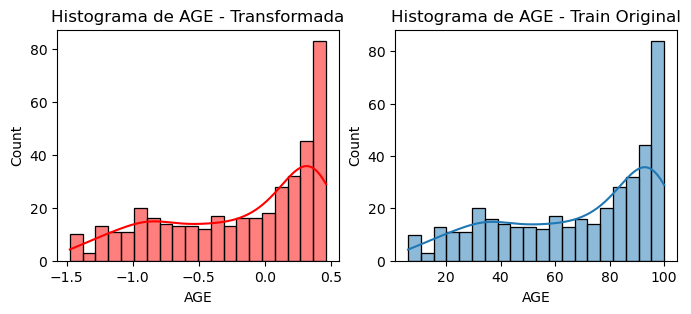

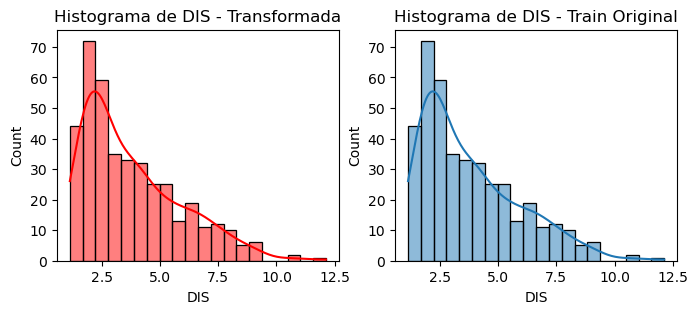

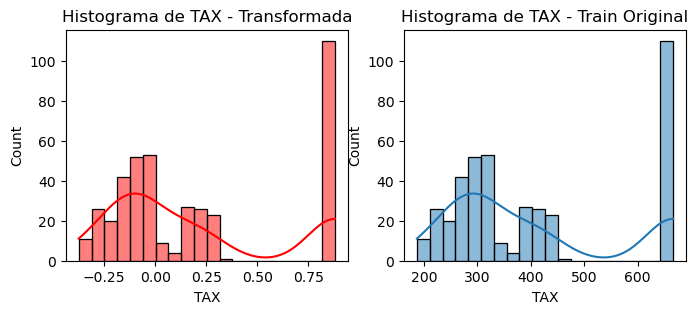

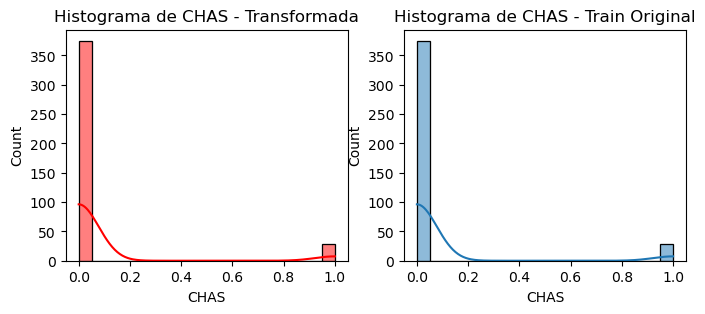

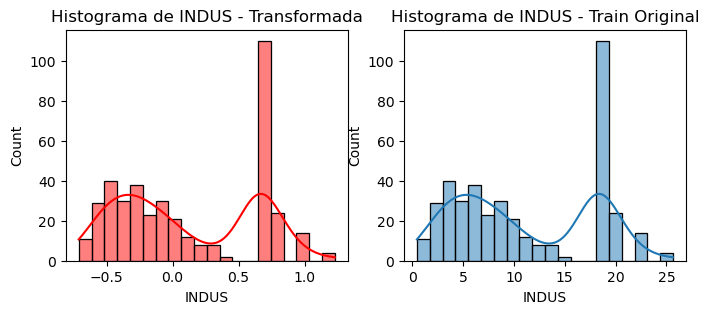

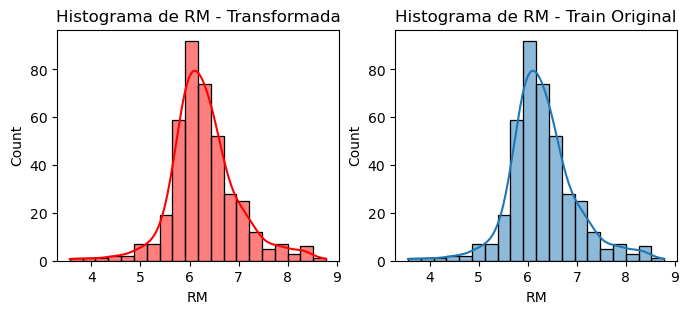

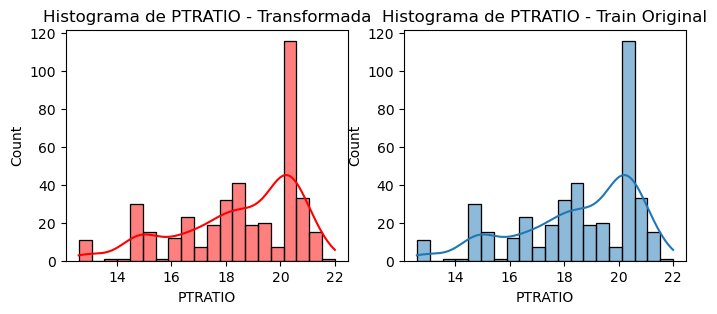

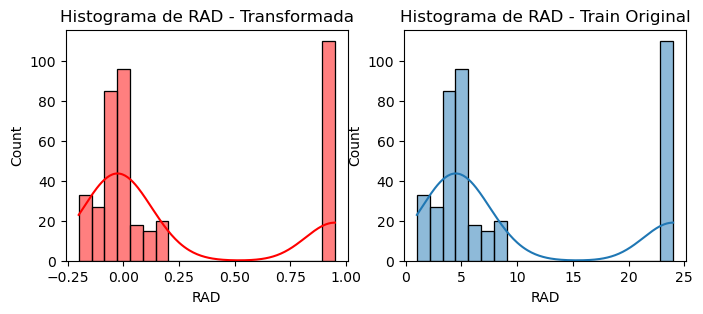

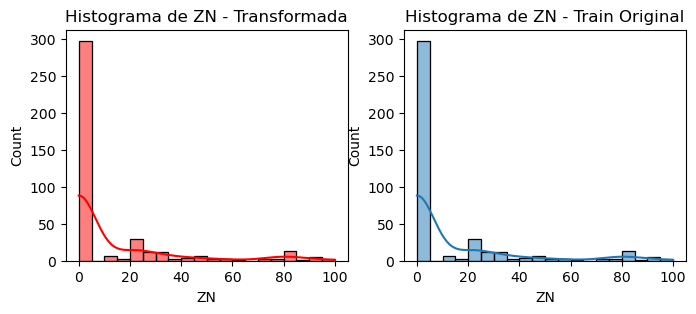

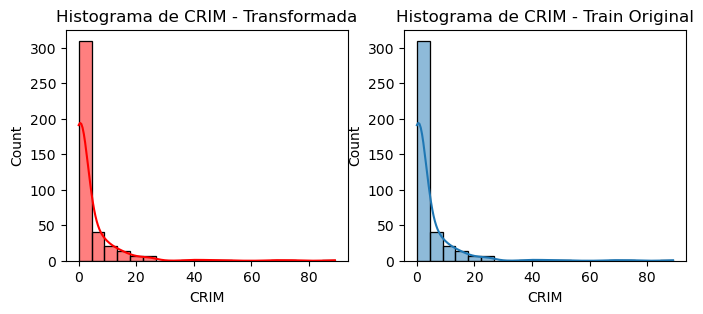

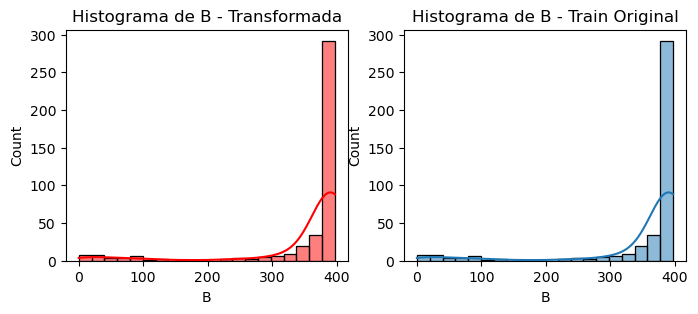

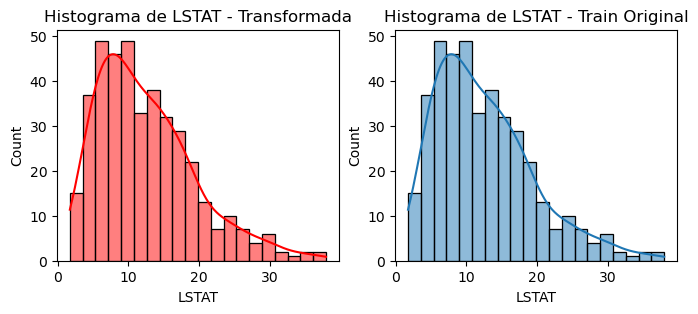

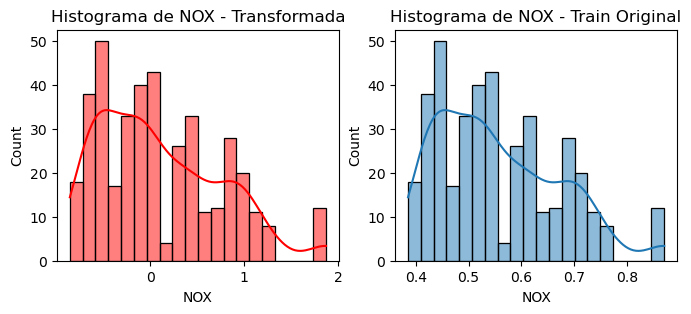

In [167]:

common_variables = set(X_train_scaled1.columns).intersection(X_train.columns)

for variable in common_variables:
    plt.figure(figsize=(8, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(X_train_scaled1[variable], kde=True, bins=20, color='red')
    plt.title(f'Histograma de {variable} - Transformada')
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.histplot(X_train[variable], kde=True, bins=20)
    plt.title(f'Histograma de {variable} - Train Original')
    plt.xlabel(variable)

Aquí se observa de manera visual que les variables una vez transformadas siguen manteniendo la misma distribución por lo que podrán ser útiles para el modelo. 